Inceptionv3

In [1]:
#import modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV @ excel file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

Path for normal, covid-19, TB
Grab all image files for every class

In [2]:
#define paths
normalpath = 'D:\\dataset300\\normal'
covidpath = 'D:\\dataset300\\covid'
tbpath = 'D:\\dataset300\\tb'

# Use glob to grab images from path .jpg or jpeg
normal_files = glob(normalpath + '/*')
covid_files = glob(covidpath + '/*')
tb_files = glob(tbpath + '/*')

In [3]:
#Store all images into a variable
allfiles = normal_files + covid_files + tb_files

In [4]:
print('There are %d normal cases.' % len(normal_files))
print('There are %d covid positive cases.' % len(covid_files))
print('There are %d tuberculosis positive cases.' % len(tb_files))

There are 300 normal cases.
There are 300 covid positive cases.
There are 300 tuberculosis positive cases.


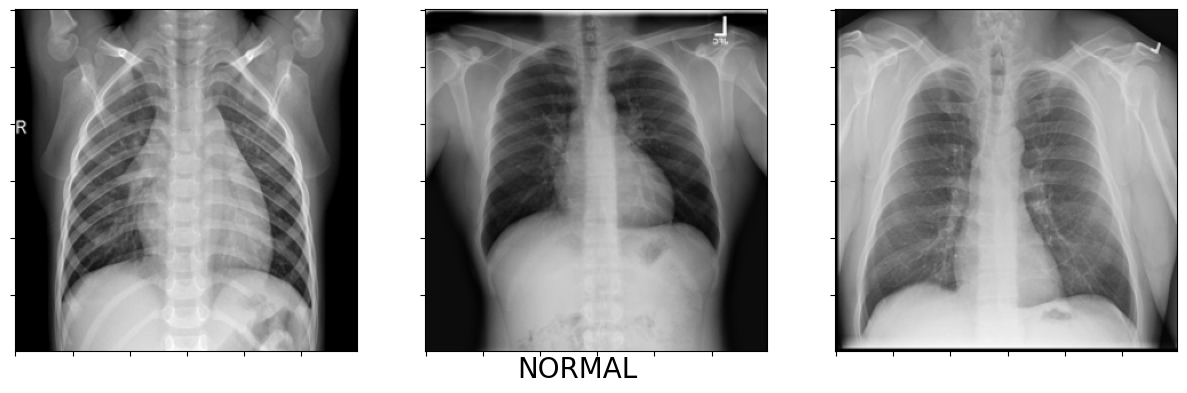

In [6]:
#show xray normal
f = plt.figure(figsize=(15,7))
f.suptitle('NORMAL',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(normal_files[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

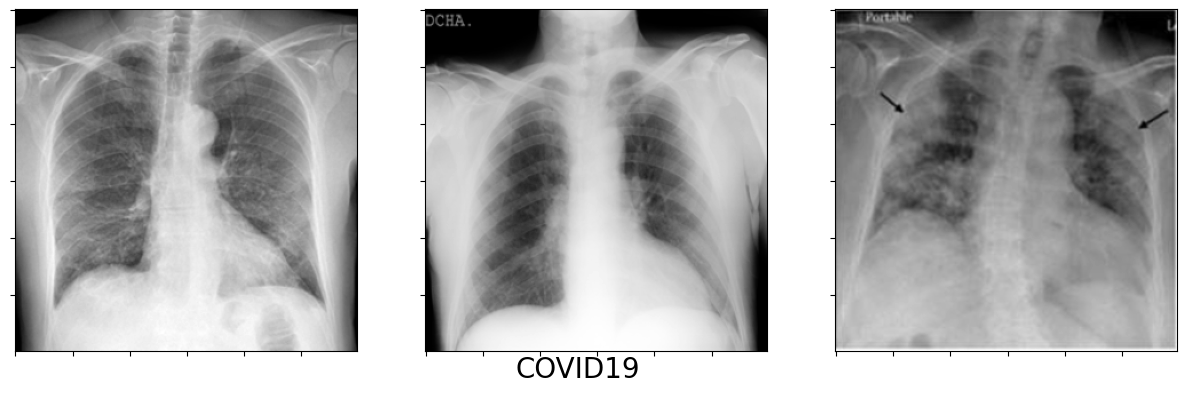

In [7]:
#show xray covid
f = plt.figure(figsize=(15,7))
f.suptitle('COVID19',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(covid_files[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

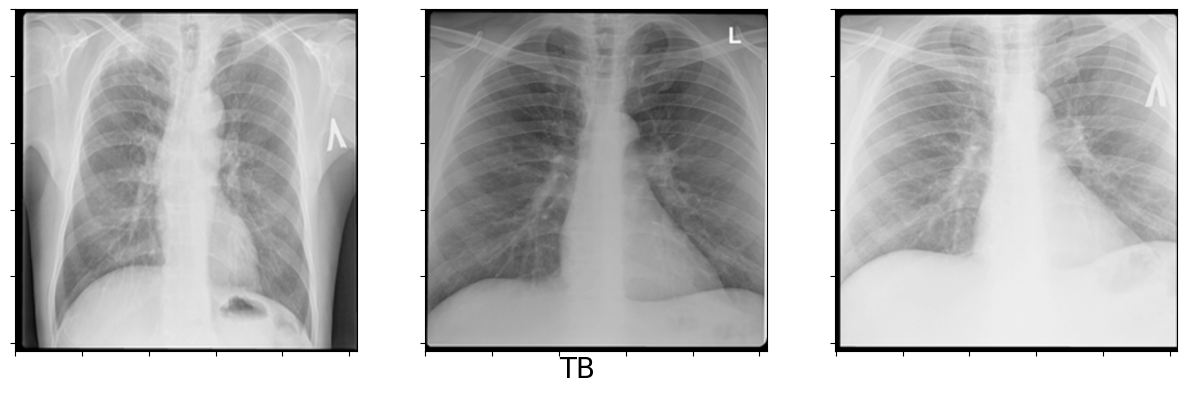

In [8]:
#show xray tb
f = plt.figure(figsize=(15,7))
f.suptitle('TB',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(tb_files[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

Preparing labels (0=NORMAL, 1=COVID19, 2=TB)

In [9]:
# Preparing Labels

import cv2

labels = []


for i in range(len(normal_files)):
  labels.append(0) #atau mungkin kena letak num like 0

for i in range(len(covid_files)):
  labels.append(1)

for i in range(len(tb_files)):
  labels.append(2)

List of images for all classes

In [10]:
images = []
for i in range(len(normal_files)):
    normfile = normal_files[i]
    images.append(normfile)
for i in range(len(covid_files)):
    covfile = covid_files[i]
    images.append(covid_files)
for i in range(len(tb_files)):
    tbfile = tb_files[i]
    images.append(tb_files)

Create dataframe containing file name with labels of Xray_class

In [11]:
img_df = pd.DataFrame({'Image_name':allfiles, 'Xray_class': labels})

In [12]:
import numpy as np
from keras.applications import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.applications.inception_v3 import preprocess_input


Create model InceptionV3

In [13]:
base_model = InceptionV3(weights="imagenet")

In [14]:
#exclude the output layer
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [ ]:
model.summary()

Use pretrained Inception V3 for feature extraction

In [15]:
from keras.utils import load_img
from keras.utils import img_to_array

In [16]:
# Output of the layer before the final classification layer: shape (1, 2048)
# features extracted from 900 images
image_size = 299
features_array = np.zeros((900,2048))

for i, img_path in enumerate(allfiles):
    img = load_img(img_path, target_size=(image_size, image_size)) #InceptionV3 input 299x299
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    X = preprocess_input(x)
    features = model.predict(X)
    features = features.reshape(2048,)
    features_array[i,:] = features

1/1 [==============================] - 0s 316ms/step


In [17]:
features_array.shape

(900, 2048)

In [20]:
df = pd.DataFrame(features_array)
df['Image_name'] = img_df.Image_name
df['Xray_class'] = img_df.Xray_class
#df.head()

In [19]:
#save extracted features into EXCEL FILE
df.to_excel("features_InceptionV3.xlsx")  